## Initializing the environment

In [1]:
import astropy.io.fits as fits
import requests
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import warnings
warnings.filterwarnings('error')

def abmag(flux):
    return np.where(flux > 0, -2.5 * np.log10(flux) + 23.9, -99.0)

 ## Reading in the input files from Box

In [2]:
## Reading in the 1st field: GOODS-S 
url = 'https://caltech.box.com/shared/static/yad6e2mgd1rbngrsfpkod86lly1gip18'
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    gs = fits.getdata(BytesIO(response.content))
else:
    print("Failed to download GOODS-S.")
    
#these are the name of the filters we use in GOODS-S and their central wavelength
centerwave_gs = {'VIMOS_U_FLUX':3734,'ACS_F435W_FLUX':4317,'ACS_F606W_FLUX':5918,'ACS_F775W_FLUX':7617,'ACS_F814W_FLUX':8047,'ACS_F850LP_FLUX':9055,'WFC3_F098M_FLUX':10215,'WFC3_F125W_FLUX':12536,'WFC3_F160W_FLUX':15370,'ISAAC_KS_FLUX':21600,'IRAC_CH1_FLUX':36000}

In [3]:
## Reading in the 2nd field: GOODS-N 
url = 'https://caltech.box.com/shared/static/jv3gyp0kkxnbql5wnpodujjn4cvchrud'
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    gn = fits.getdata(BytesIO(response.content))
else:
    print("Failed to download GOODS-N.")
    
centerwave_gn = {'KPNO_U_FLUX':3647,'ACS_F435W_FLUX':4317,'ACS_F606W_FLUX':5918,'ACS_F775W_FLUX':7617,'ACS_F814W_FLUX':8047,'ACS_F850LP_FLUX':9055,'WFC3_F105W_FLUX':10215,'WFC3_F125W_FLUX':12536,'WFC3_F160W_FLUX':15370,'CFHT_KS_FLUX':21460,'IRAC_CH1_SCANDELS_FLUX':36000}

In [4]:
## Reading in the 3rd field: UDS 
url = 'https://caltech.box.com/shared/static/q8oxrb3zisw0xnekrocuydxwoivge91x'
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    uds = fits.getdata(BytesIO(response.content))
else:
    print("Failed to download UDS.")
    
centerwave_uds = {'CFHT_U_FLUX':3825,'SUBARU_B_FLUX':4500,'SUBARU_r_FLUX':5960,'ACS_F606W_FLUX':6500,'SUBARU_i_FLUX':7680,'ACS_F814W_FLUX':8047,'SUBARU_Z_FLUX':8890,'HAWKI_Y_FLUX':10215,'WFC3_F125W_FLUX':12536,'WFC3_F160W_FLUX':15370,'HAWKI_KS_FLUX':21470,'IRAC_CH1_SEDS_FLUX':36000}

In [5]:
## Reading in the 4th field: EGS 
url = 'https://caltech.box.com/shared/static/sthjm6vl6b8bdhvg38lyursps9xnoc6h'
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    egs = fits.getdata(BytesIO(response.content))
else:
    print("Failed to download EGS.")
    
centerwave_egs = {'CFHT_U_FLUX':3825,'CFHT_G_FLUX':4810,'ACS_F606W_FLUX':5960,'CFHT_R_FLUX':6250,'CFHT_I_FLUX':7690,'ACS_F814W_FLUX':8090,'CFHT_Z_FLUX':10215,'WFC3_F125W_FLUX':12536,'WFC3_F160W_FLUX':15370,'WIRCAM_K_FLUX':21460,'IRAC_CH1_FLUX':36000}

In [6]:
## Reading in the 5th field: COSMOS
url = 'https://caltech.box.com/shared/static/27xwurf6t3yj2i4mn0atk7gof4y22ow9'
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    cos = fits.getdata(BytesIO(response.content))
else:
    print("Failed to download COSMOS.")
    
centerwave_cos = {'CFHT_U_FLUX':3825,'SUBARU_B_FLUX':4500,'CFHT_G_FLUX':5960,'ACS_F606W_FLUX':6500,'CFHT_I_FLUX':7619,'ACS_F814W_FLUX':8047,'SUBARU_Z_FLUX':8829,'ULTRAVISTA_Y_FLUX':10215,'WFC3_F125W_FLUX':12536,'WFC3_F160W_FLUX':15370,'ULTRAVISTA_Ks_FLUX':21521,'IRAC_Ch1_FLUX':36000}

 ## Plotting the SED (spectral energy distribution) of one data point
 Flux as a function of wavelength

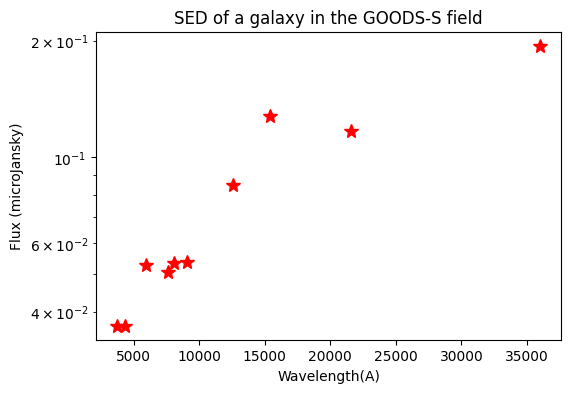

In [7]:
np.random.seed(0)
randomid = np.random.randint(len(gs))
plt.figure(figsize=(6,4))
plt.title('SED of a galaxy in the GOODS-S field')
for w in centerwave_gs:
    if gs[w][randomid] > 0:  # Only plot positive flux values
        plt.plot(centerwave_gs[w],gs[w][randomid],'r*',markersize=10)

plt.yscale('log')
plt.xlabel('Wavelength(A)')
plt.ylabel('Flux (microJansky)')
plt.show()

##  We need output to be a catalog combined of all 5 fields with flux in the filters below:

In [8]:
centerwave_out = {'u':3826,'g':4877,'r':6231,'i':7618,'z':8828,'y':10214,'j':12535,'h':14453,'k':17316}

## Analysis
In this problem, the dataset provides flux values in certain filters. From the plot above, we can see the flux-wavelength graph is approximately on a convex cruve. 

Next, let's take a look at the dataset. For example, here is the information of *GOODS-S* on given filters. There are quite a few abnormal values that we should deal with. 

In [9]:
import pandas as pd
pd.DataFrame(gs).describe().loc[:,centerwave_gs.keys()]

,VIMOS_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F098M_FLUX,WFC3_F125W_FLUX,WFC3_F160W_FLUX,ISAAC_KS_FLUX,IRAC_CH1_FLUX
count,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000
mean,0.322808,-4.399468,-0.102127,-0.823109,-1.483708,1.686355,-69.787811,3.654203,3.991100,-5.844304,3.342598
std,7.970996,21.465401,13.453255,20.992052,27.716833,33.350401,75.758593,112.096743,106.081086,76.111678,49.231254
min,-0.318017,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-1734.010000
25%,0.007179,0.013496,0.028873,0.037617,0.035604,0.044518,-99.000000,0.056951,0.074858,-0.006129,0.081873
50%,0.032959,0.041127,0.070636,0.092666,0.091372,0.110195,-99.000000,0.141888,0.172424,0.119335,0.242488
75%,0.096307,0.119635,0.195190,0.264505,0.270919,0.331239,0.026369,0.448729,0.550107,0.421591,0.763727
max,773.852000,332.656000,964.991000,1480.310000,1883.650000,2162.130000,10004.600000,11713.500000,11445.400000,7369.330000,4842.690000


In this exercise, we need the flux in filters `centerwave_out`. However, the requested flux values are not explicitly given in the dataset, so we have to determine the unknown values based on the given relationship between flux and wavelength.

## Simple method

Since central wavelengths of output filters are within the range of given filters, we can simply implement an interpolation method to obtain the flux values. Here, I choose cubic spline method due to its high accuracy and smoothness. Then I implement it on flux values in log scale for higher accuracy. Negative flux values are filtered out.

In [10]:
from scipy.interpolate import CubicSpline

# keep positive flux values
def del_neg(x, y):
    for i in reversed(range(len(x))):
        if y[i] <= 0:
            x = np.delete(x, i)
            y = np.delete(y, i)
    return x, y

def log_spline(wavelength, flux, centerwave_out):
    wavelength, flux = del_neg(wavelength, flux)
    flux_log = np.log(flux)
    flux_loginterp = CubicSpline(wavelength, flux_log) # interpolation in log scale
    flux_out = np.exp(flux_loginterp(centerwave_out))
    return flux_loginterp, flux_out

We can implement the method on all data points. First, I will demonstrate with one data point in each field. 

Plot notations: 
- *star* for original data points
- *cross* for required data points
- *line* for the interpolated curve

*All SED plots in this notebook are on log scale.*

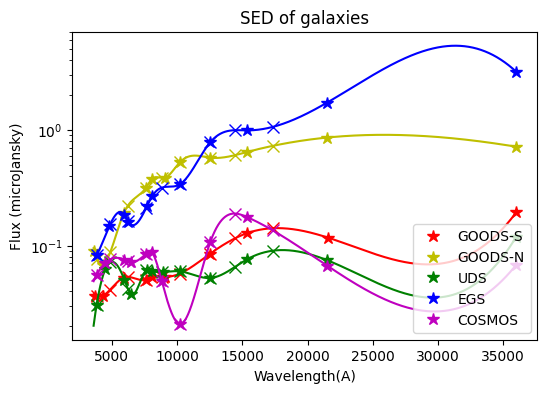

In [11]:
fields_name = ['GOODS-S', 'GOODS-N', 'UDS', 'EGS', 'COSMOS']
fields_var = [gs, gn, uds, egs, cos]
filters_var = [centerwave_gs, centerwave_gn, centerwave_uds, centerwave_egs, centerwave_cos]
colors = ['r', 'y', 'g', 'b', 'm']
wavelengths_out = np.array(list(centerwave_out.values()))
wavelengths_interp = np.arange(3600, 36000)
plt.rcParams["legend.loc"] = "lower right"

plt.figure(figsize=(6,4))
plt.title('SED of galaxies')
for field, fieldname, filterdic, color in zip(fields_var, fields_name, filters_var, colors):
    wavelengths = np.array(list(filterdic.values()))
    fluxes = np.array([field[filtr][randomid] for filtr in filterdic])
    flux_loginterp, flux_out = log_spline(wavelengths, fluxes, wavelengths_out)
    
    plt.plot(wavelengths, fluxes, color+'*', markersize=9, label=fieldname)
    plt.plot(wavelengths_out, flux_out, color+'x', markersize=8)
    plt.plot(wavelengths_interp, np.exp(flux_loginterp(wavelengths_interp)), color)

plt.yscale('log')
plt.xlabel('Wavelength(A)')
plt.ylabel('Flux (microJansky)')
plt.legend()
plt.show()

For cubic spline method, the output values are close to real values though the interpolated curve does not fit very well. 

Then, I implement the method on all data points and concatenate output values into a pandas dataframe.

In [12]:
data_out = [[]] * 5
i = 0
for field, filterdic in zip(fields_var, filters_var):
    data_outi = np.empty(len(wavelengths_out))
    for id in range(field.shape[0]):
        try:
            wavelengths = np.array(list(filterdic.values()))
            fluxes = np.array([field[filtr][id] for filtr in filterdic])
            _, flux_out = log_spline(wavelengths, fluxes, wavelengths_out)
            data_outi = np.vstack((data_outi, flux_out))
        except ValueError as e:
            # pass galaxies with 1 or less positive flux value
            pass
        except RuntimeWarning:
            # pass overflow
            pass
    data_out[i] = data_outi
    i += 1

In [13]:
data_col1 = np.array([[field] * len(centerwave_out) for field in fields_name]).flatten()
data_col2 = np.array(list(centerwave_out.keys()) * len(fields_name))
df_list = [[]] * 5
for i in range(5):
    col_name = [fields_name[i] + '_' + key for key in list(centerwave_out.keys())]
    df_list[i] = pd.DataFrame(data=data_out[i], columns=pd.Series(col_name))
df_out = df_list[0]
for i in range(4):
    if (df_list[i].shape[0] >= df_list[i+1].shape[0]):
        df_out = df_out.join(df_list[i+1], how='left')
    else:
        df_out = df_out.join(df_list[i+1], how='right')

`df_out` is the output dataframe. It consists of 45 columns and 41440 rows. The column names show the field and filter names. Since the five fields do not have the same amount of data, there are some null values. 

In [14]:
df_out

,GOODS-S_u,GOODS-S_g,GOODS-S_r,GOODS-S_i,GOODS-S_z,GOODS-S_y,GOODS-S_j,GOODS-S_h,GOODS-S_k,GOODS-N_u,...,EGS_k,COSMOS_u,COSMOS_g,COSMOS_r,COSMOS_i,COSMOS_z,COSMOS_y,COSMOS_j,COSMOS_h,COSMOS_k
0,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,0.005644,...,0.095421,0.079554,0.060142,0.052342,0.055742,0.059737,0.063360,0.090573,0.108412,0.093617
1,0.964782,2.706869,8.142444,15.675621,21.868319,29.020069,37.903233,48.062685,74.340647,0.032227,...,1.295280,0.006146,0.002181,0.007923,0.126000,0.283214,0.011755,0.000008,0.000001,0.000012
2,0.156623,0.153481,0.114620,0.106965,0.179835,0.336898,0.489005,0.436706,0.236129,0.026460,...,0.149837,0.094936,0.105511,0.123474,0.157822,0.188543,0.112989,0.141132,0.214242,0.238068
3,0.702554,1.864877,3.769996,5.176865,5.987766,6.882993,8.466251,9.865260,11.984796,0.012186,...,0.205921,0.024272,0.045451,0.099819,0.287036,0.470723,0.289180,0.373926,0.434189,0.440454
4,0.035936,0.126099,0.336259,0.535128,0.612837,0.649677,0.706325,0.807781,1.098142,0.085599,...,0.154173,0.247318,0.314165,0.411902,0.536417,0.609963,0.540834,0.622059,0.885813,1.206951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.065563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.211744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.093617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then, we can convert the dataframe to another type we want and save the file. For example, to `Table` in `astropy`.

In [15]:
from astropy.table import Table
file_out = Table.from_pandas(df_out)
file_out.info

<Table length=41440>
   name    dtype     class     n_bad
--------- ------- ------------ -----
GOODS-S_u float64 MaskedColumn  6516
GOODS-S_g float64 MaskedColumn  6516
GOODS-S_r float64 MaskedColumn  6516
GOODS-S_i float64 MaskedColumn  6516
GOODS-S_z float64 MaskedColumn  6516
GOODS-S_y float64 MaskedColumn  6516
GOODS-S_j float64 MaskedColumn  6516
GOODS-S_h float64 MaskedColumn  6516
GOODS-S_k float64 MaskedColumn  6516
GOODS-N_u float64 MaskedColumn  6000
GOODS-N_g float64 MaskedColumn  6000
GOODS-N_r float64 MaskedColumn  6000
GOODS-N_i float64 MaskedColumn  6000
GOODS-N_z float64 MaskedColumn  6000
GOODS-N_y float64 MaskedColumn  6000
GOODS-N_j float64 MaskedColumn  6000
GOODS-N_h float64 MaskedColumn  6000
GOODS-N_k float64 MaskedColumn  6000
    UDS_u float64 MaskedColumn  5522
    UDS_g float64 MaskedColumn  5522
    UDS_r float64 MaskedColumn  5522
    UDS_i float64 MaskedColumn  5522
    UDS_z float64 MaskedColumn  5522
    UDS_y float64 MaskedColumn  5522
    UDS_j float64

## Machine learning - L1 regularization

Regarding to noise and errors in observations, not all data points are accurate and should be fitted perfectly. In machine learning, it's crucial to add a penalty function to prevent overfitting. Here, I implemented L1 regularization method on the dataset. 

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
X_predict = np.array(list(centerwave_out.values()))
X_all = wavelengths_interp

mean squared error for GOODS-S:	-0.0008078579538156822
mean squared error for GOODS-N:	-0.1483027408870464
mean squared error for UDS:	-8.09049506398981e-05
mean squared error for EGS:	-0.06640539553100672
mean squared error for COSMOS:	-0.007568829442659052


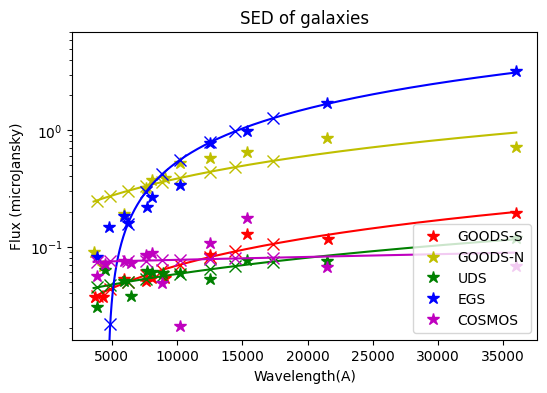

In [17]:
plt.figure(figsize=(6,4))
plt.title('SED of galaxies')
for field, fieldname, filterdic, color in zip(fields_var, fields_name, filters_var, colors):
    X_train = np.array(list(filterdic.values()))
    y_train = np.array([field[filtr][randomid] for filtr in filterdic])
    X_train, y_train = del_neg(X_train, y_train)
    
    # define model
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train.reshape(-1,1), y_train)
    scores = cross_val_score(lasso, X_train.reshape(-1,1), y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'mean squared error for {fieldname}:\t{scores.mean()}')
    y_predict = lasso.predict(X_predict.reshape(-1,1))
    y_all = lasso.predict(X_all.reshape(-1,1))
    
    plt.plot(X_train, y_train, color+'*', markersize=9, label=fieldname)
    plt.plot(X_predict, y_predict, color+'x', markersize=8)
    plt.plot(X_all, y_all, color)

plt.yscale('log')
plt.ylim(10**(-1.8), 7)
plt.xlabel('Wavelength(A)')
plt.ylabel('Flux (microJansky)')
plt.legend()
plt.show()

This time, the predicted curve does not fit all data correctly but looks like a simple function. We may find out the exact relationship by trying the combination of basic functions with similar shapes.

## Deep Learning - linear regression

We can also solve the problem with deep learning models. Let's try a simple linear regression model with four layers, two of which are hidden. The first hidden layer has 16 nodes and the second one has 32 nodes.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):    
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# the following code for early stopping is from:
# https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

To train the model, I use mean squared error as error function and stochastic gradient descent as optimizer. The largest epoch number is set to 10000 while early stopping is enabled. For simplicity, I only trained on one galaxy from GOODS-S. 

The model was trained on cpu and `manual_seed` is set for reproducibility.

In [19]:
torch.manual_seed(97)

field = fields_var[0]
filterdic = filters_var[0]
X_train = np.array(list(filterdic.values()))
y_train = np.array([field[filtr][randomid] for filtr in filterdic])
X_train, y_train = del_neg(X_train, y_train)

# rescale training data
X_train = X_train / 30000
y_train = y_train * 7

X_train = torch.as_tensor(X_train.reshape(-1,1)).float().to(device)
y_train = torch.as_tensor(y_train.reshape(-1,1)).float().to(device)

mlp = MLP()
mlp.to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.038, momentum=0.8)
early_stopper = EarlyStopper(patience=10, min_delta=1e-10)

# train
EPOCHS = 10000
loss_all = []
for epoch in range(EPOCHS):
    y_predict = mlp(X_train)
    loss = loss_func(y_predict, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_all.append(loss.data)
    
    if (early_stopper.early_stop(loss.data)):
        print('Epoch {0: <3}  loss={1}'.format(str(epoch+1), loss.data))
        EPOCHS = epoch + 1
        break
    if ((epoch+1) % 500 == 0):
        print('Epoch {0: <3}  loss={1}'.format(str(epoch+1), loss.data))
print('Training end.')

Epoch 500  loss=0.006579643581062555
Epoch 1000  loss=0.005811817944049835
Epoch 1500  loss=0.00499557564035058
Epoch 2000  loss=0.004367755260318518
Epoch 2436  loss=0.00399771798402071
Training end.


Plot training loss. 

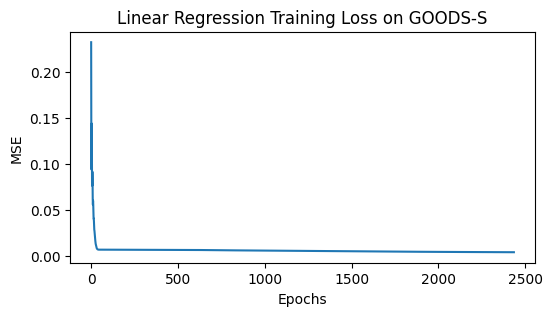

In [20]:
plt.figure(figsize=(6,3))
plt.plot(range(EPOCHS), loss_all)
plt.title('Linear Regression Training Loss on GOODS-S')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

Plot predicted values.

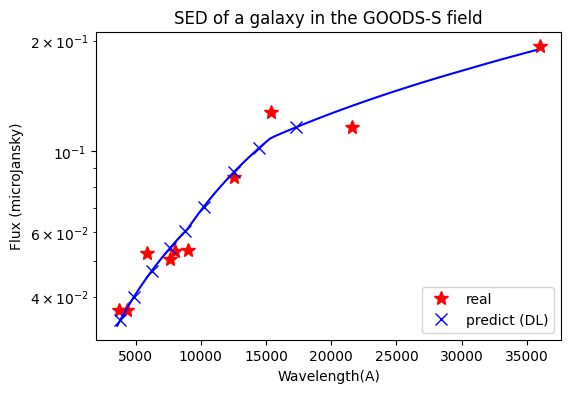

In [22]:
X_out = torch.as_tensor((np.array(list(centerwave_out.values())) / 30000).reshape(-1,1)).float()
y_out = mlp(X_out)
X_predict = torch.as_tensor(np.arange(0.12, 1.2, 0.01).reshape(-1,1)).float()
y_predict = mlp(X_predict)
plt.figure(figsize=(6,4))
plt.plot(X_train * 30000, y_train / 7, 'r*', markersize=10, label='real')
plt.plot(X_out.numpy() * 30000, y_out.detach().numpy() / 7, 'bx',markersize=9, label='predict (DL)')
plt.plot(X_predict.numpy() * 30000, y_predict.detach().numpy() / 7, 'b')
plt.yscale('log')
plt.rcParams['legend.loc'] = 'lower right'
plt.legend()
plt.title('SED of a galaxy in the GOODS-S field')
plt.xlabel('Wavelength(A)')
plt.ylabel('Flux (microJansky)')
plt.show()

The predicted curve goes between real data points, which is what we expected.